In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated('CustomerId').sum()

0

In [6]:
df = df.set_index('CustomerId')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


# Encoding

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.replace({'Geography': {'France': 2, 'Germany':1, 'Spain' :0}}, inplace=True)

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.replace({'Gender': {'Male': 0,'Female':1}},inplace=True)

In [12]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [13]:
df.replace({'NumOfProducts':{1: 0, 2:1, 3:1, 4:1}}, inplace=True)




In [14]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [15]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [16]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

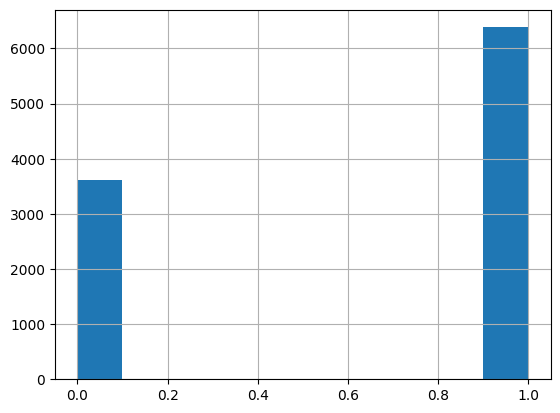

In [17]:
df['Zero Balance'].hist()

In [18]:
df.groupby(['RowNumber', 'Geography']).count()

,,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero Balance
RowNumber,Geography,,,,,,,,,,,,
1,2,1,1,1,1,1,1,1,1,1,1,1,1
2,0,1,1,1,1,1,1,1,1,1,1,1,1
3,2,1,1,1,1,1,1,1,1,1,1,1,1
4,2,1,1,1,1,1,1,1,1,1,1,1,1
5,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,1,1,1,1,1,1,1,1,1,1,1,1
9997,2,1,1,1,1,1,1,1,1,1,1,1,1
9998,2,1,1,1,1,1,1,1,1,1,1,1,1


# Define Label and Features

In [19]:
df.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Zero Balance'],
      dtype='object')

In [20]:
X =df.drop(['Surname','RowNumber'],axis = 1)

In [21]:
y =df['RowNumber']

In [22]:
X.shape, y.shape

((10000, 12), (10000,))

# Handling Imbalance Data

In [23]:
df['RowNumber'].value_counts()

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64

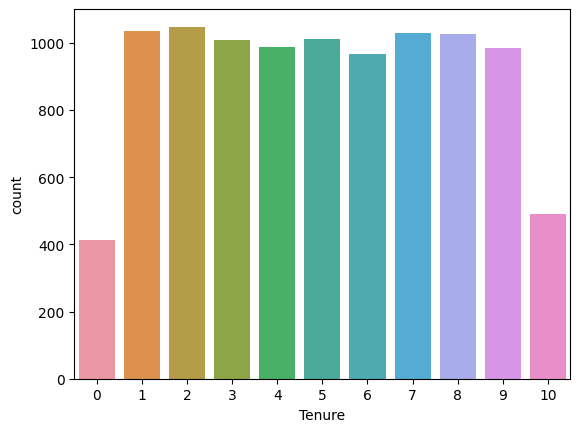

In [24]:
sns.countplot(x ='Tenure',data =df);

In [25]:
X.shape, y.shape

((10000, 12), (10000,))

# Random Under Sampling

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
from imblearn.under_sampling import RandomUnderSampler

In [28]:
rus = RandomUnderSampler(random_state=2529)

In [29]:
X_rus, y_rus = rus.fit_resample(X,y)

In [30]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((10000, 12), (10000,), (10000, 12), (10000,))

In [31]:
y.value_counts()

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64

In [32]:
y_rus.value_counts()

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64

<Axes: ylabel='Frequency'>

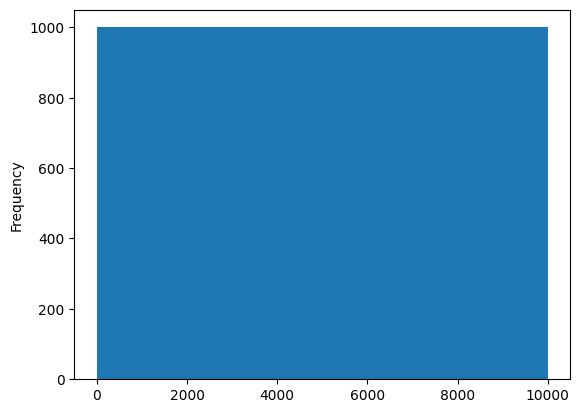

In [33]:
y_rus.plot(kind = 'hist')

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

# Split Original Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Support Vector Machine Classifier

In [36]:
from sklearn.svm import SVC

In [37]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
y_pred = svc.predict(X_test)

# Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV